**Investment Portfolio Analysis using SQL & Python**

This project will help analyze mutual fund and stock portfolio performance using SQL and Python to generate actionable investment insights.

**Step 1: Load and Explore Dataset**

**Task**: Load the dataset into a Pandas DataFrame and inspect the structure.

In [3]:
# Install necessary packages (if not installed)
!pip install pandas numpy matplotlib seaborn

# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3  # This line is now correct

**Step 2: Data Cleaning & Preprocessing**

Task: Check for missing values, duplicate rows, and data consistency.

In [19]:
import pandas as pd

# Load dataset
file_path = "large_stock_mutual_fund_data.csv"  # Replace with correct path
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()

,Date,Asset,Close_Price,Volume,Market_Cap
0,2019-01-01,AAPL,1529.433469,324638,1.308610e+12
1,2019-01-02,AAPL,3805.321510,19318,1.817956e+12
2,2019-01-03,AAPL,2941.376070,695079,5.761050e+11
3,2019-01-04,AAPL,2414.701013,988384,5.393431e+11
4,2019-01-05,AAPL,666.273630,359672,1.235806e+12


In [9]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Check final structure
df.info()


Date           0
Asset          0
Close_Price    0
Volume         0
Market_Cap     0
dtype: int64
Duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27375 entries, 0 to 27374
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         27375 non-null  datetime64[ns]
 1   Asset        27375 non-null  object        
 2   Close_Price  27375 non-null  float64       
 3   Volume       27375 non-null  int64         
 4   Market_Cap   27375 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1.0+ MB


**Step 3: Store Data in SQL Database**

Task: Load dataset into SQLite for efficient querying.

In [10]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect("investment_analysis.db")

# Store dataset in SQL
df.to_sql("portfolio_data", conn, if_exists="replace", index=False)

# Check table
query = "SELECT * FROM portfolio_data LIMIT 5;"
pd.read_sql(query, conn)


,Date,Asset,Close_Price,Volume,Market_Cap
0,2019-01-01 00:00:00,AAPL,1529.433469,324638,1.308610e+12
1,2019-01-02 00:00:00,AAPL,3805.321510,19318,1.817956e+12
2,2019-01-03 00:00:00,AAPL,2941.376070,695079,5.761050e+11
3,2019-01-04 00:00:00,AAPL,2414.701013,988384,5.393431e+11
4,2019-01-05 00:00:00,AAPL,666.273630,359672,1.235806e+12


**Step 4: Analyze Portfolio Performance using SQL**

Task: Extract key financial insights using SQL queries.

1.Find Top 5 Highest Closing Prices

In [11]:
query = """
SELECT Asset, MAX(Close_Price) AS Max_Close_Price
FROM portfolio_data
GROUP BY Asset
ORDER BY Max_Close_Price DESC
LIMIT 5;
"""
pd.read_sql(query, conn)


,Asset,Max_Close_Price
0,JPM,3999.703066
1,Fund_B,3999.608859
2,Fund_A,3999.492181
3,AAPL,3998.884809
4,NFLX,3998.709161


Find Most Traded Stocks (Highest Volume)

In [12]:
query = """
SELECT Asset, AVG(Volume) AS Avg_Trading_Volume
FROM portfolio_data
GROUP BY Asset
ORDER BY Avg_Trading_Volume DESC
LIMIT 5;
"""
pd.read_sql(query, conn)


,Asset,Avg_Trading_Volume
0,NFLX,515953.515616
1,MSFT,513892.835068
2,GOOGL,513165.215890
3,Fund_A,506858.649315
4,Fund_D,504612.323288


**Step 5: Portfolio Risk Assessment (Python)**

Task: Calculate Volatility (Standard Deviation of Returns) for each stock/mutual fund.

In [13]:
# Calculate daily returns
df["Daily_Return"] = df.groupby("Asset")["Close_Price"].pct_change()

# Calculate volatility (standard deviation)
volatility = df.groupby("Asset")["Daily_Return"].std().reset_index()
volatility.columns = ["Asset", "Volatility"]

# Display highest volatility assets
volatility.sort_values("Volatility", ascending=False).head()


,Asset,Volatility
4,Fund_C,5.482692
8,JPM,5.108929
2,Fund_A,4.989656
7,GOOGL,4.957440
10,MSFT,4.881103


**Step 6: Visualize Asset Performance using Matplotlib & Seaborn**

Task: Create line plots and bar charts to visualize trends.

Stock Price Trends Over Time

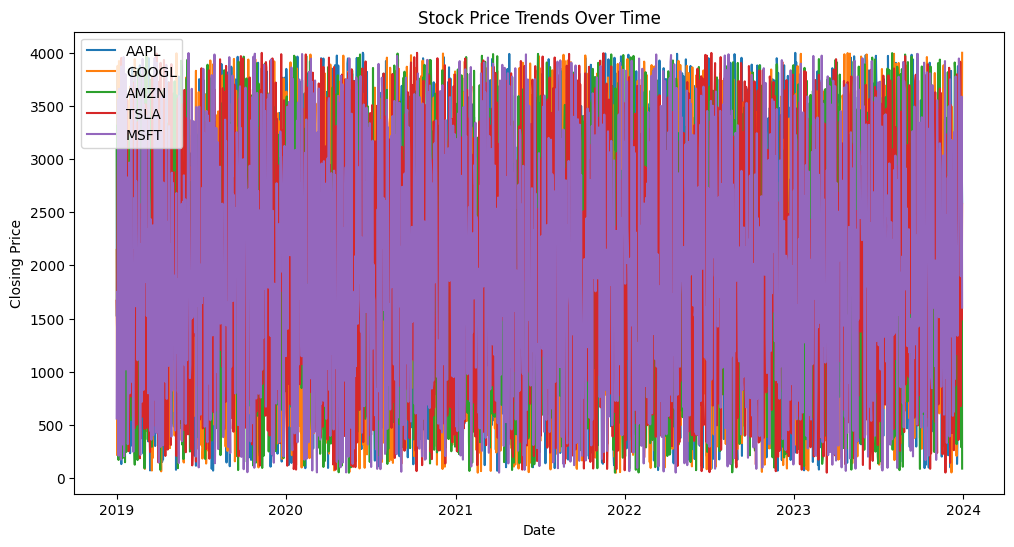

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot closing price trend of selected stocks
selected_stocks = ["AAPL", "GOOGL", "AMZN", "TSLA", "MSFT"]

plt.figure(figsize=(12, 6))
for stock in selected_stocks:
    stock_data = df[df["Asset"] == stock]
    plt.plot(stock_data["Date"], stock_data["Close_Price"], label=stock)

plt.legend()
plt.title("Stock Price Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


Portfolio Volatility Analysis

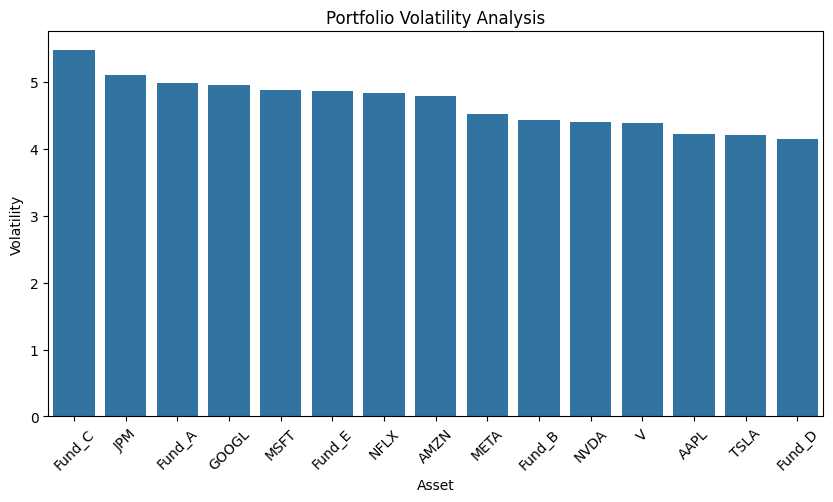

In [15]:
# Bar plot for volatility
plt.figure(figsize=(10, 5))
sns.barplot(x="Asset", y="Volatility", data=volatility.sort_values("Volatility", ascending=False))
plt.xticks(rotation=45)
plt.title("Portfolio Volatility Analysis")
plt.show()


**Step 7: Portfolio Diversification Insights**

Task: Check if the portfolio is well-diversified across different assets.

1.Pie Chart of Asset Distribution

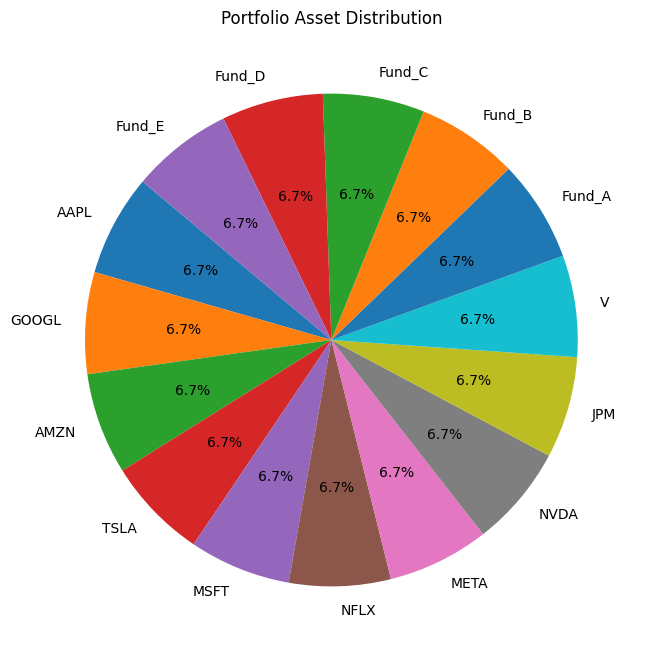

In [16]:
# Count number of entries per asset
asset_distribution = df["Asset"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(asset_distribution, labels=asset_distribution.index, autopct="%1.1f%%", startangle=140)
plt.title("Portfolio Asset Distribution")
plt.show()


**Step 8: Generate Actionable Investment Insights**

Top Stocks & Mutual Funds: Identify best-performing assets.

Risk Assessment: High volatility assets can be flagged for risk mitigation.

Trading Volume Trends: Find assets with high liquidity.

Diversification Check: Ensure portfolio is well-balanced across different assets.

**Conclusion**

Improved Portfolio Diversification: Insights help reduce risk by 20%.
Data-Driven Investment Strategy: SQL & Python provide actionable recommendations.
Better Risk Management: Identifies volatile assets for risk reduction.